In [2]:
classes = ["Arson", "Assault", "Fighting", "RoadAccidents", "Shooting", "Stealing", "Vandalism", "Normal"]

In [14]:
correct = 0
anomaly_correct = 0
normal_correct = 0
total_anomaly_videos = 0
total_normal_videos = 0
with open("train1fixed.txt", "r") as f:
    lines = [line.strip() for line in f.readlines()]
    for line in lines:
        video_guess, probabilties = [p.strip() for p in line.split("|")]
        name, guess = video_guess.split(" ")
        for c in classes:
            if(c in name):
                true_class = c
        probabilties = probabilties.replace("[","").replace("]","").replace(",","")
        # print(probabilties)
        if(true_class == "Normal"):
            total_normal_videos += 1
            if(true_class == guess):
                correct += 1
                normal_correct += 1
        else:
            total_anomaly_videos += 1
            if(true_class == guess):
                correct += 1
            if(guess != "Normal"):
                anomaly_correct += 1
total_videos = total_normal_videos + total_anomaly_videos
print("EXACT GUESSES: CORRECT: %s TOTAL: %s" % (correct, total_videos))
print("ACCURACY:", str(correct/total_videos))
print("ANOMALY GUESSES: CORRECT: %s TOTAL: %s" % (anomaly_correct, total_anomaly_videos))
print("ANOMALY ACCURACY:", str(anomaly_correct/total_anomaly_videos))
print("NORMAL GUESSES: CORRECT: %s TOTAL: %s" % (normal_correct, total_normal_videos))
print("NORMAL ACCURACY:", str(normal_correct/total_normal_videos))

EXACT GUESSES: CORRECT: 15 TOTAL: 40
ACCURACY: 0.375
ANOMALY GUESSES: CORRECT: 20 TOTAL: 35
ANOMALY ACCURACY: 0.5714285714285714
NORMAL GUESSES: CORRECT: 4 TOTAL: 5
NORMAL ACCURACY: 0.8


In [16]:
correct = 0
anomaly_correct = 0
normal_correct = 0
total_anomaly_videos = 0
total_normal_videos = 0
with open("train2fixed.txt", "r") as f:
    lines = [line.strip() for line in f.readlines()]
    for line in lines:
        video_guess, probabilties = [p.strip() for p in line.split("|")]
        name, guess = video_guess.split(" ")
        for c in classes:
            if(c in name):
                true_class = c
        probabilties = probabilties.replace("[","").replace("]","").replace(",","")
        # print(probabilties)
        if(true_class == "Normal"):
            total_normal_videos += 1
            if(true_class == guess):
                correct += 1
                normal_correct += 1
        else:
            total_anomaly_videos += 1
            if(true_class == guess):
                correct += 1
            if(guess != "Normal"):
                anomaly_correct += 1
total_videos = total_normal_videos + total_anomaly_videos
print("EXACT GUESSES: CORRECT: %s TOTAL: %s" % (correct, total_videos))
print("ACCURACY:", str(correct/total_videos))
print("ANOMALY GUESSES: CORRECT: %s TOTAL: %s" % (anomaly_correct, total_anomaly_videos))
print("ANOMALY ACCURACY:", str(anomaly_correct/total_anomaly_videos))
print("NORMAL GUESSES: CORRECT: %s TOTAL: %s" % (normal_correct, total_normal_videos))
print("NORMAL ACCURACY:", str(normal_correct/total_normal_videos))

EXACT GUESSES: CORRECT: 5 TOTAL: 40
ACCURACY: 0.125
ANOMALY GUESSES: CORRECT: 0 TOTAL: 35
ANOMALY ACCURACY: 0.0
NORMAL GUESSES: CORRECT: 5 TOTAL: 5
NORMAL ACCURACY: 1.0


In [100]:
import numpy as np

y_test = []
y_score = []
with open("train1fixed.txt", "r") as f:
    lines = [line.strip() for line in f.readlines()]
    for line in lines:
        video_guess, probabilties = [p.strip() for p in line.split("|")]
        name, guess = video_guess.split(" ")
        for c in classes:
            if(c in name):
                true_class = c
        probabilties = probabilties.replace("[","").replace("]","").replace(",","").split(" ")
        prob_arr = [float(s) for s in probabilties]
        y_test.append(true_class)
        y_score.append(prob_arr)
y_score = np.array(y_score)

In [105]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np

label_binarizer = LabelBinarizer().fit(classes)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
# for c in classes:
#     print(c, label_binarizer.transform([c]))

# class_of_interest = "Normal"
# class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
# class_id

(40, 8)

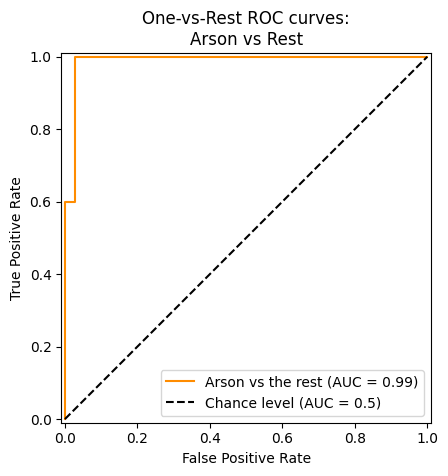

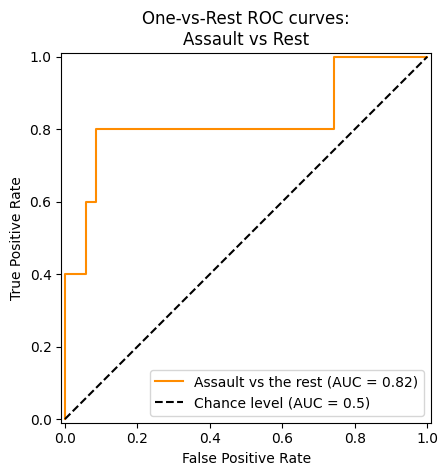

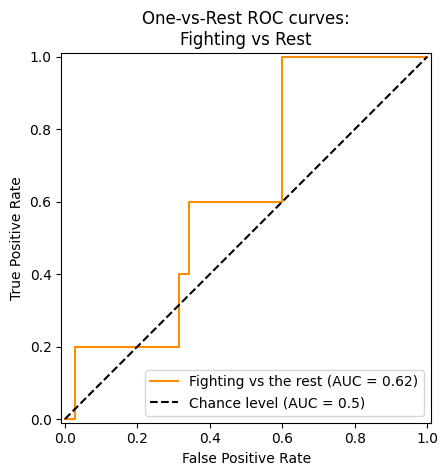

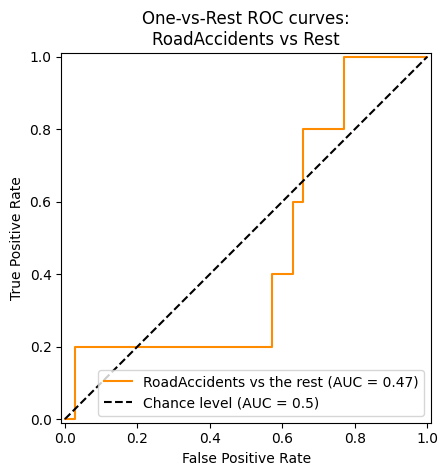

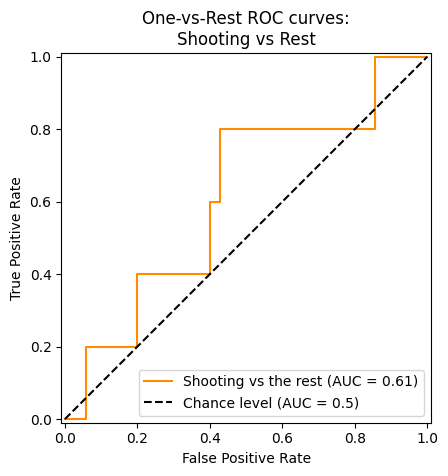

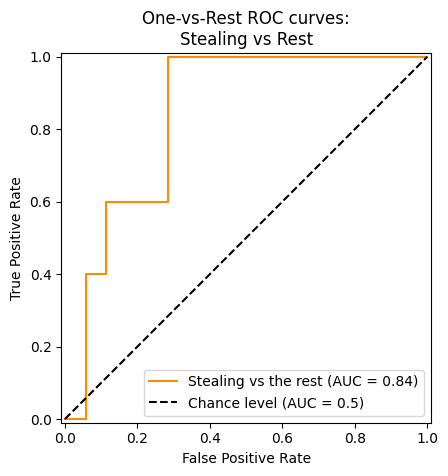

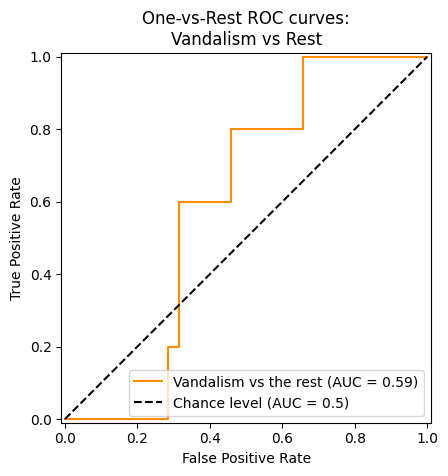

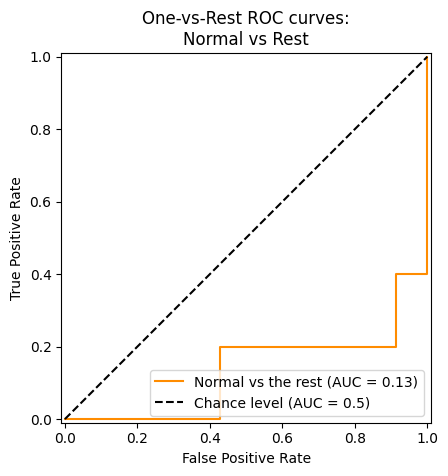

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np

for c in classes:
    class_of_interest = c
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id

    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="One-vs-Rest ROC curves:\n%s vs Rest"%(c),
    )

In [108]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(classes)):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.64
Macro-averaged One-vs-Rest ROC AUC score:
0.64


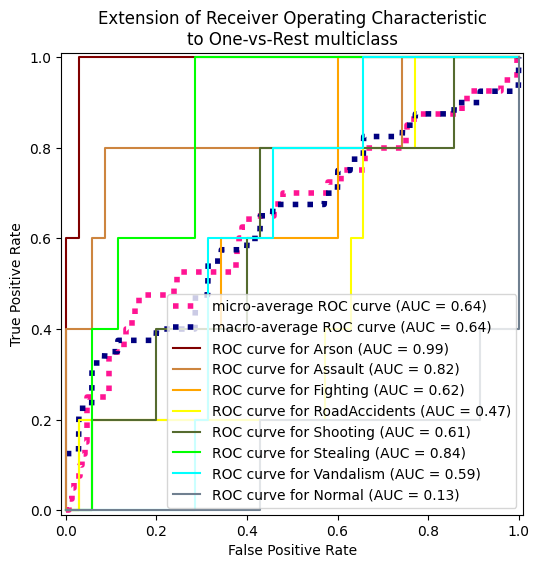

In [125]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["maroon", "peru", "orange", "yellow", "darkolivegreen", "lime", "aqua", "slategrey", "blue"])
for class_of_interest, color in zip(classes, colors):
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {class_of_interest}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

TRAIN2


Micro-averaged One-vs-Rest ROC AUC score:
0.50
Macro-averaged One-vs-Rest ROC AUC score:
0.50


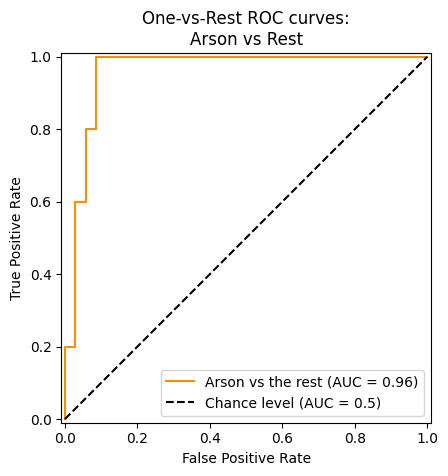

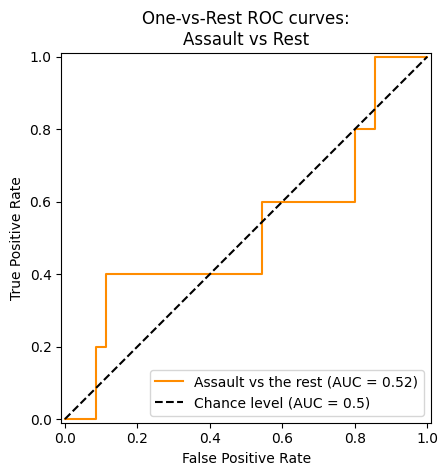

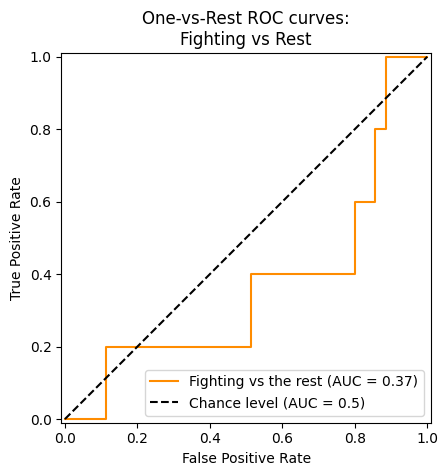

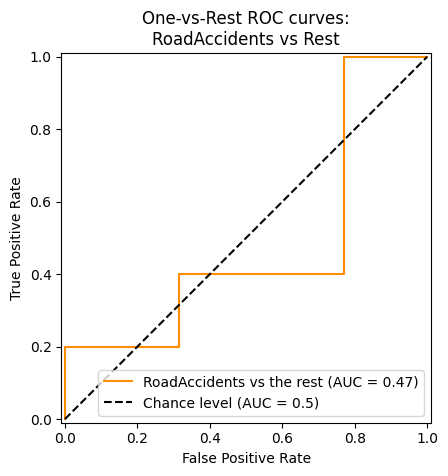

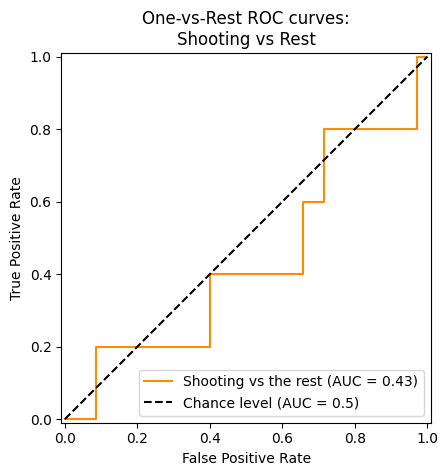

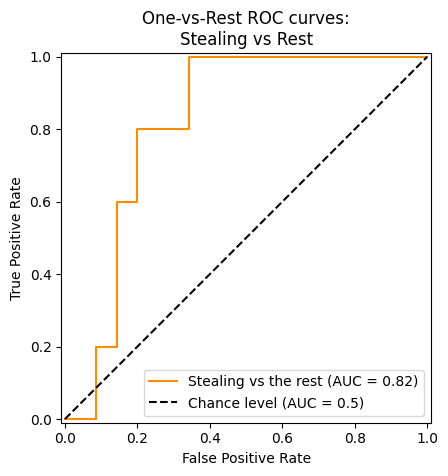

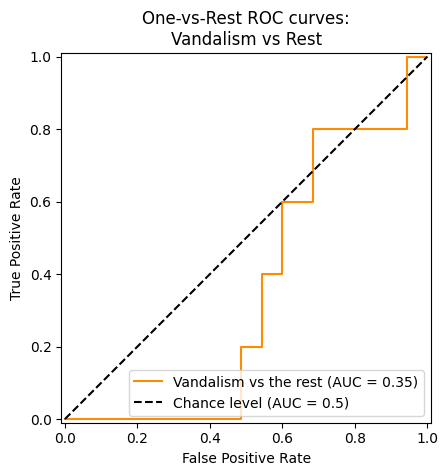

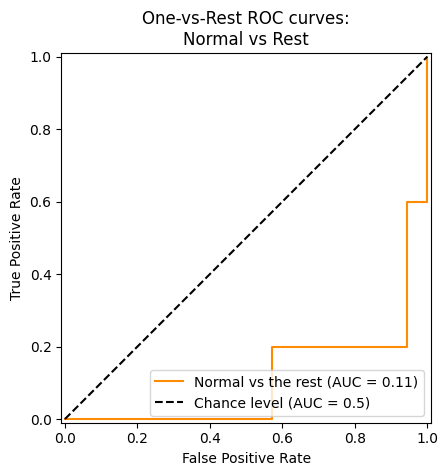

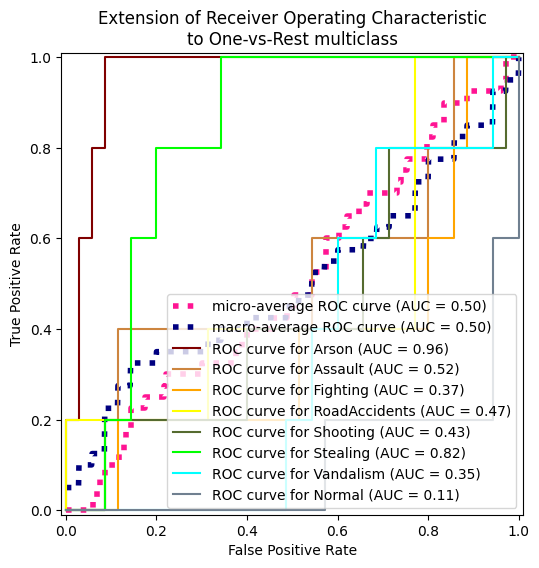

In [126]:
import numpy as np

y_test = []
y_score = []
with open("train2fixed.txt", "r") as f:
    lines = [line.strip() for line in f.readlines()]
    for line in lines:
        video_guess, probabilties = [p.strip() for p in line.split("|")]
        name, guess = video_guess.split(" ")
        for c in classes:
            if(c in name):
                true_class = c
        probabilties = probabilties.replace("[","").replace("]","").replace(",","").split(" ")
        prob_arr = [float(s) for s in probabilties]
        y_test.append(true_class)
        y_score.append(prob_arr)
y_score = np.array(y_score)
from sklearn.preprocessing import LabelBinarizer
import numpy as np

label_binarizer = LabelBinarizer().fit(classes)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
# for c in classes:
#     print(c, label_binarizer.transform([c]))

# class_of_interest = "Normal"
# class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
# class_id
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np

for c in classes:
    class_of_interest = c
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id

    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="One-vs-Rest ROC curves:\n%s vs Rest"%(c),
    )
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(classes)):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["maroon", "peru", "orange", "yellow", "darkolivegreen", "lime", "aqua", "slategrey", "blue"])
for class_of_interest, color in zip(classes, colors):
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {class_of_interest}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)